#### First make sure you have the required modules installed (`xarray`, `numpy`, `matplotlib`, `cmocean`, `cartopy`)

In [7]:
import os
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from cmocean import cm
import cartopy.crs as ccrs
img = plt.imread('/home/jan/Data/cartopy_images/BlueMarble_TOPO_010_JAN.png')

We use Optimum Interpolation Sea Surface Temperature (OISST) v2.1 data provided by NOAA ([link](https://www.ncdc.noaa.gov/oisst/data-access)) for this example.  

We use `xarray` to open the data for 01 Jan 2020. We can just provide the OPENDAP link to `xarray`.

In [8]:
ds = xr.open_dataset("https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/" 
                     + "202001/oisst-avhrr-v02r01.20200101.nc")

In [9]:
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T12:00:00
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * zlev     (zlev) float32 0.0
Data variables:
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 ...
Attributes:
    source:                          ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pa...
    naming_authority:                gov.noaa.ncei
    cdm_data_type:                   Grid
    date_modified:                   2020-02-11T16:01:00Z
    date_created:                    2020-02-11T16:01:00Z
    processing_level:                NOAA Level 4
    institution:                     NOAA/National Centers for Environmental ...
    creator_url:                     https://www.ncei.noaa.gov/
    creator_email:                   oisst-help@noaa.gov
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    keywords_vocabulary:             Global Change Master Directory (GCMD) Ea...
    platform_vocabulary:             Global Change Master Directory (GCMD) Pl...
    instrument:                      Earth Remote Sensing Instruments > Passi...
    instrument_vocabulary:           Global Change Master Directory (GCMD) In...
    standard_name_vocabulary:        CF Standard Name Table (v40, 25 January ...
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              0.0
    geospatial_lon_max:              360.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.25
    time_coverage_start:             2020-01-01T00:00:00Z
    time_coverage_end:               2020-01-01T23:59:59Z
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v2.0
    Conventions:                     CF-1.6, ACDD-1.3
    history:                         Final file created using preliminary as ...
    metadata_link:                   https://doi.org/10.25921/RE9P-PT57
    sensor:                          Thermometer, AVHRR
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    references:                      Reynolds, et al.(2007) Daily High-Resolu...
    summary:                         NOAAs 1/4-degree Daily Optimum Interpola...
    product_version:                 Version v02r01
    platform:                        Ships, buoys, Argo floats, MetOp-A, MetOp-B
    comment:                         Data was converted from NetCDF-3 to NetC...
    id:                              oisst-avhrr-v02r01.20200101.nc
    DODS_EXTRA.Unlimited_Dimension:  time

After looking at the dataset to find out how the variables are named, we can plot a nice image.  

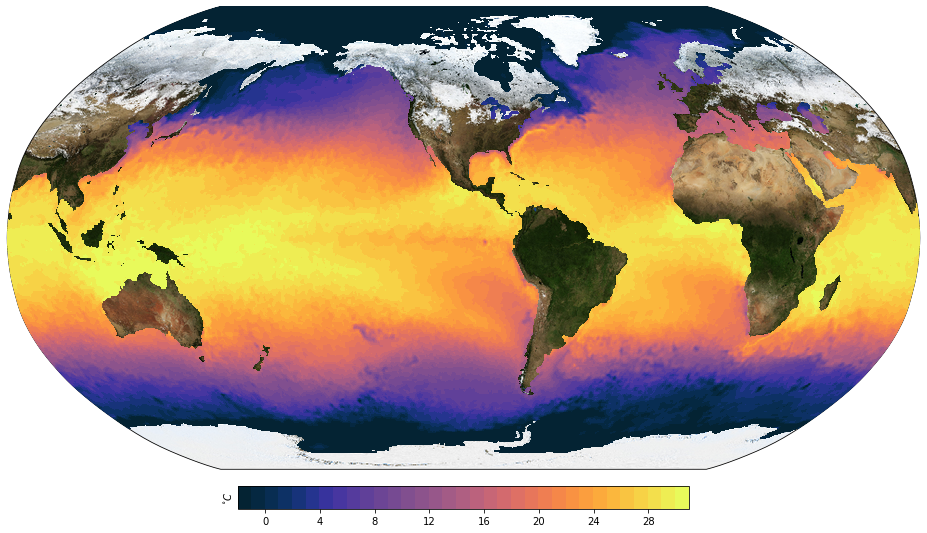

In [5]:
# First we make the size of the figure big 
# (depending on your notebook settings, you might need to adjust the values)
plt.figure(figsize=(16,8))
ax = plt.gca()

# Next, we define some levels for the colors we want to use in order to create a discrete (and not continuous)
# colormap
levs = np.arange(-2, 32, 1)
norm = colors.BoundaryNorm(boundaries=levs, ncolors=256)

# Now we tell pyplot which projection we want to use
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100.0))

# and display the background image in that projection
ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=500, zorder=1)
# increase `regrid_shape` for higher resolutoin background image

# Now we need to add the SST data
map1 = ax.pcolormesh(ds.lon, ds.lat, ds.sst.squeeze(), 
                    cmap=cm.thermal, norm=norm, transform=ccrs.PlateCarree(), zorder=2)
# Note that the `zorder` arguments are used to make sure, the SSt is displayed above the background image
# and the norm argument is used to tell pcolormesh to use the color-levels defined in `levs`

# Now we add a colorbar and make sure it is nicely positioned below the map and it has an appropriate label    
c = plt.colorbar(map1, pad=0.03, shrink=0.4, orientation='horizontal')
c.ax.set_ylabel('$^{\circ}C$')

# And finally, we get rid of all the excessive white space around the map
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)


The following is just a repetition of the map above, with a different projection

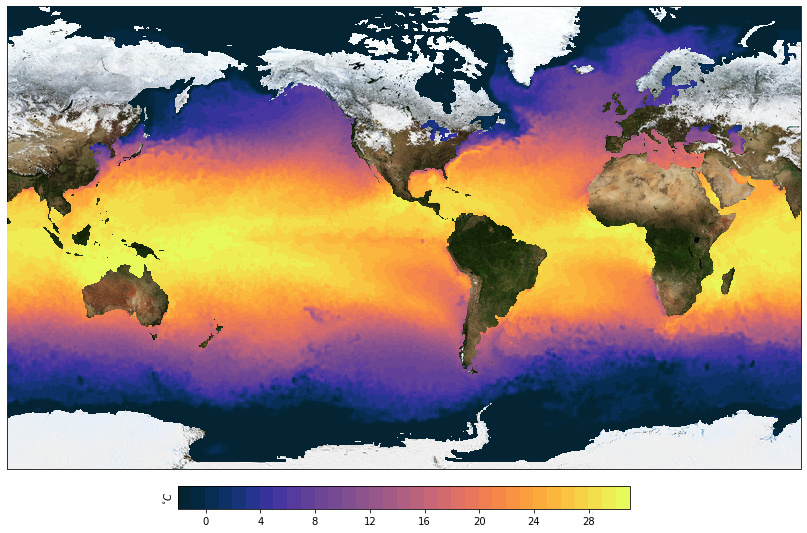

In [11]:
plt.figure(figsize=(16,8))
ax = plt.gca()
    
levs = np.arange(-2, 32, 1)
norm = colors.BoundaryNorm(boundaries=levs, ncolors=256)
    
ax = plt.axes(projection=ccrs.Miller(central_longitude=-100.0))
ax.set_extent([-180, 180, -80, 80], ccrs.PlateCarree())
# We limit the extend here to 76deg South to 76deg North because the Miller projection is not really designed
# to display the whole range of latitudes (Antarctica and the Arctic will be huge... try if you want!)

ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='spline36', regrid_shape=500)

map1 = ax.pcolormesh(ds.lon, ds.lat, ds.sst.squeeze(), 
                    cmap=cm.thermal, norm=norm, transform=ccrs.PlateCarree(), zorder=3)
    
c = plt.colorbar(map1, pad=0.03, shrink=0.4, orientation='horizontal')
c.ax.set_ylabel('$^{\circ}C$')

plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)